## Breadth-First Search (BFS)

**Breadth-First Search (BFS)** is a graph traversal algorithm that explores nodes **level by level**:

1. Start at the **source (root) node**.
2. Visit all nodes **directly connected** to the source.
3. Move on to the **next layer of neighbors**, continuing outward until the goal is found or all nodes are explored.

BFS uses a **queue** data structure to keep track of nodes to be explored.  
- The queue works on the **First In, First Out (FIFO)** principle.  
- Each time a node is dequeued, all of its unexplored neighbors are enqueued.  

👉 This guarantees that BFS always finds the path with the **minimum number of edges** (shortest path) in an unweighted graph or tree.


In [13]:
from objectsclass import BinaryTreeProblem, Node, Problem
from drawingfunctions import *
from breadthfirst_algorithm import *

In [14]:
tree1 = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': [],
    'E': [],
    'F': [],
    'G': []
}


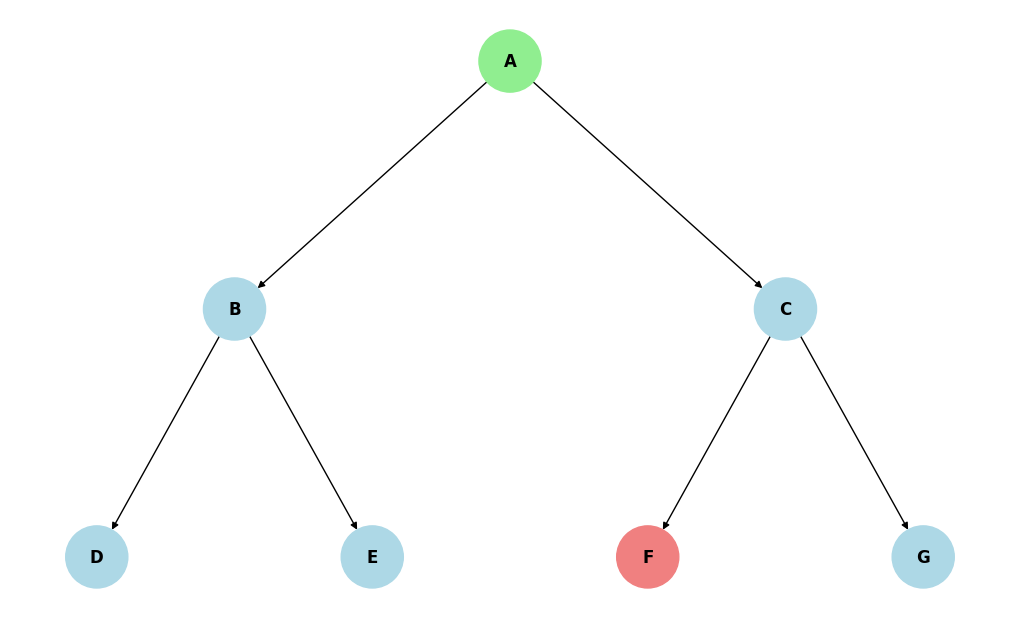

In [15]:
draw_tree(tree1, 'A', 'F')


Goal = **G**

| Step | Current Node | Queue (Frontier) after operation |
|------|--------------|----------------------------------|
| 0    | –            | [A]                             |
| 1    | A (dequeue)  | [B, C]                          |
| 2    | B (dequeue)  | [C, D, E]                       |
| 3    | C (dequeue)  | [D, E, F, G]                    |
| 4    | D (dequeue)  | [E, F, G]                       |
| 5    | E (dequeue)  | [F, G]                          |
| 6    | F (dequeue)  | [G]                             |
| 7    | G (dequeue)  | [] → **Goal found!**            |

---

👉 Notice how BFS explores **level by level**, and the queue always contains the *next frontier* of nodes waiting to be expanded.


Example Tree 2: 

In [16]:
tree2 = {
    'A': ['B', 'C', 'D'],
    'B': ['E', 'F'],
    'C': ['G'],
    'D': ['H', 'I'],
    'E': ['J'],
    'F': [],
    'G': ['K', 'L'],
    'H': ['M'],
    'I': ['N'],
    'J': [],
    'K': [],
    'L': ['O'],
    'M': [],
    'N': ['P'],
    'O': [],
    'P': []
}

initial = 'A'
goal = 'L'  # target leaf
problem = BinaryTreeProblem(initial, goal, tree2)

print("Tree (parent -> children):")
for k, v in tree2.items():
    print(f"  {k} -> {v}")
print(f"\nInitial: {initial}, Goal: {goal}")


Tree (parent -> children):
  A -> ['B', 'C', 'D']
  B -> ['E', 'F']
  C -> ['G']
  D -> ['H', 'I']
  E -> ['J']
  F -> []
  G -> ['K', 'L']
  H -> ['M']
  I -> ['N']
  J -> []
  K -> []
  L -> ['O']
  M -> []
  N -> ['P']
  O -> []
  P -> []

Initial: A, Goal: L


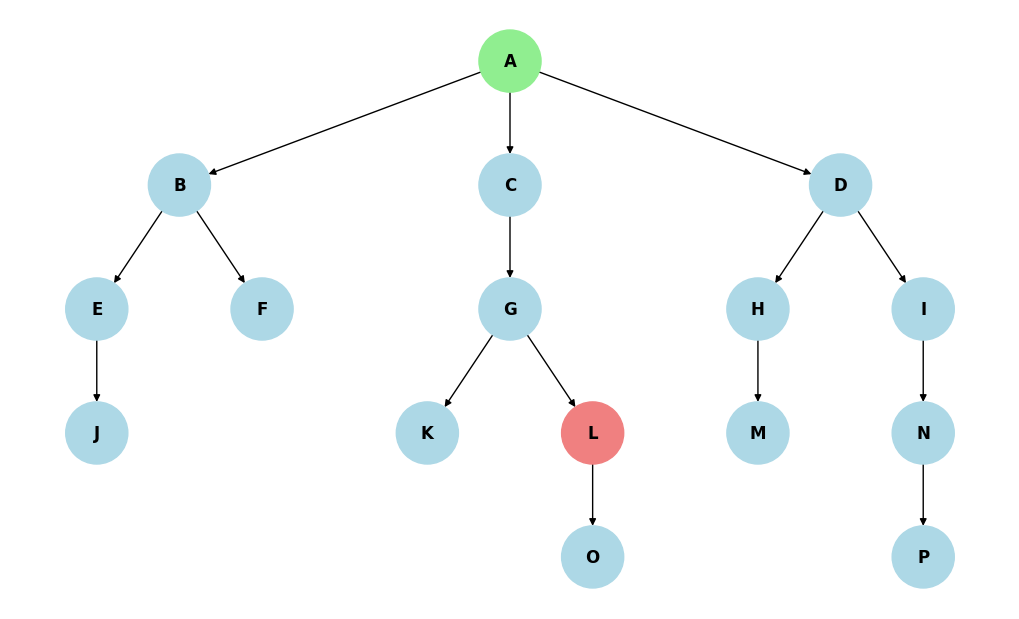

In [17]:
draw_tree(tree2, root=initial, target=goal)

*Run and inspect the trace*

In [18]:
solution = breadth_first_search(problem, verbose=True)

def reconstruct_path(node):
    path = []
    while node:
        path.append(node.state)
        node = node.parent
    return list(reversed(path))

if solution:
    path = reconstruct_path(solution)
    print("\nSolution path:", path)
else:
    print("No solution found.")

Step 0: init
  Frontier: [<objectsclass.Node object at 0x000001BF28F123B0>]

Step 1: pop -> A
    generate child: B
    generate child: C
    generate child: D
  Frontier: ['B', 'C', 'D']

Step 2: pop -> B
    generate child: E
    generate child: F
  Frontier: ['C', 'D', 'E', 'F']

Step 3: pop -> C
    generate child: G
  Frontier: ['D', 'E', 'F', 'G']

Step 4: pop -> D
    generate child: H
    generate child: I
  Frontier: ['E', 'F', 'G', 'H', 'I']

Step 5: pop -> E
    generate child: J
  Frontier: ['F', 'G', 'H', 'I', 'J']

Step 6: pop -> F
  Frontier: ['G', 'H', 'I', 'J']

Step 7: pop -> G
    generate child: K
    generate child: L
    ** GOAL FOUND ** -> L

Solution path: ['A', 'C', 'G', 'L']
